In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rotate
import skimage.io as io
import pandas as pd
import seaborn as sns

In [2]:
Lipos_m=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\Score_mean_by_case.csv')
Osteo_m=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Sarcomes\\Score_mean_by_case.csv')
Lipos_g=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\Score_global.csv')
Osteo_g=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Sarcomes\\Score_global.csv')
Lipos_d=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\Score_std_by_case.csv')
Osteo_d=pd.read_csv('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Sarcomes\\Score_std_by_case.csv')
Lipo_global=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_Lipos.csv')
Lipo_g1=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_(pretraitement)_Lipos.csv')
Lipo_g=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_(sans_rien)_Lipos.csv')
Osteo_global=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_Osteo.csv')
Osteo_g1=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_(pretraitment)_Osteo.csv')
Osteo_g=pd.read_csv(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\Score_global_(sans_rien)_Osteo.csv')

In [3]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False


f1 = open("C:\\Users\\zelmouaffek\\Desktop\\\Data_Lipos\\test_data_part_1.txt", "r")
Num_l=[]
Case_l=[]

a=f1.readline()
num_case=a[6:9]
Num_l=[]
Case_l=[]
lf1=0
for x in f1 :
    if RepresentsInt(x[6:9]) == True :    
        num_case=a[6:9]
        i=1
        while a[6:9]==num_case :
            i+=1
            a=f1.readline()
        Num_l.append(i)
        Case_l.append(num_case)
    elif RepresentsInt(x[6:8]) == True :    
        num_case=a[6:8]
        i=1
        while a[6:8]==num_case :
            i+=1
            a=f1.readline()
        Num_l.append(i)
        Case_l.append(num_case)
    elif RepresentsInt(x[6:7]) == True :    
        num_case=a[6:7]
        i=1
        while a[6:7]==num_case :
            i+=1
            a=f1.readline()
        Num_l.append(i)
        Case_l.append(num_case)
    lf1+=1

In [4]:
f2 = open("C:\\Users\\zelmouaffek\\Desktop\\\Data_Lipos\\test_data_part_2.txt", "r")

lf2=0
for x in f2 :
        if RepresentsInt(x[13:16]) == True :    
            num_case=a[13:16]
            i=1
            Case_l.append(a[6:12]+'_'+num_case)
            while a[13:16]==num_case :
                i+=1
                a=f2.readline()
            Num_l.append(i)
        elif RepresentsInt(x[13:15]) == True :    
            num_case=a[13:15]
            i=1
            Case_l.append(a[6:12]+'_'+num_case)
            while a[13:15]==num_case :
                i+=1
                a=f2.readline()
            Num_l.append(i)
        elif RepresentsInt(x[13:14]) == True :    
            Num_l_case=a[13:14]
            i=1
            Case_l.append(a[6:12]+'_'+str(num_case))
            while a[13:14]==num_case :
                i+=1
                a=f2.readline()
            Num_l.append(i)
        lf2+=1
r=Case_l.index("_")
del Case_l [r]
del Num_l [r]
Num_l[lf1]+=1

In [5]:
f = open("C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\Test_volumes_slices_order.txt", "r")
a=f.readline()
num_case=a[6:9]
Num_O=[]
Case_O=[]
for x in f :
    num_case=a[6:9]
    i=1
    while a[6:9]==num_case :
        i+=1
        a=f.readline()
    Num_O.append(i)
    Case_O.append(num_case)

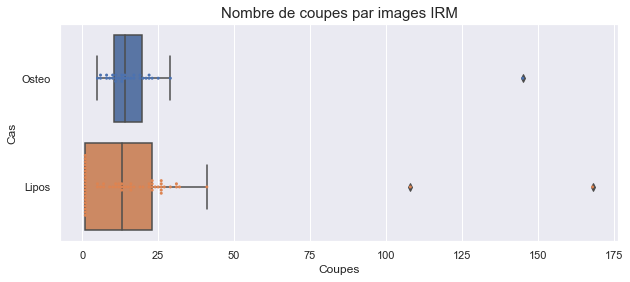

In [6]:
#Boxpolt SLices IRM

fig=plt.figure(figsize=(10, 4))
keys=[]
Value=[]

for i in range(len(Num_O)) :
    keys.append('Osteo')
    Value.append(Num_O[i])
for i in range(len(Num_l)):
    keys.append('Lipos')
    Value.append(Num_l[i])
T={"Cas":keys,
   "Coupes":Value}
T=pd.DataFrame(T)
sns.set(style="darkgrid")
sns.boxplot(x=T['Coupes'], y=T["Cas"])
sns.swarmplot(x=T['Coupes'], y=T["Cas"],size=3)
plt.title("Nombre de coupes par images IRM",fontsize=15)
plt.show()

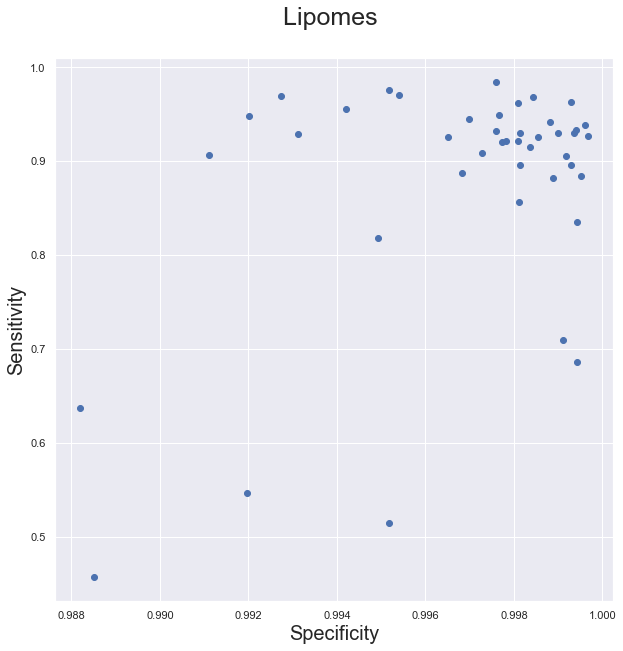

In [7]:
#Scatter plot des Lipos
fig=plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
plt.scatter(x=Lipos_m['Specifity'],y=Lipos_m['Sensitivity'],c='b')
plt.title('Lipomes \n ', fontsize=25)
plt.xlabel("Specificity",rotation='horizontal',fontsize=20)
plt.ylabel("Sensitivity",fontsize=20)
plt.savefig("C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\Scatter_plot_1.jpEg", bbox_inches='tight', quality =100)

Text(0, 0.5, 'Sensitivity')

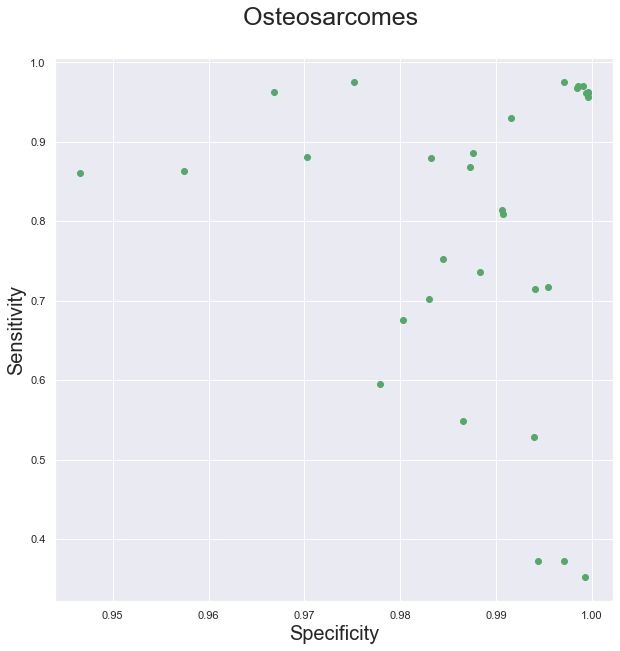

In [8]:
#Scatter plot des Osteos

fig=plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
plt.scatter(x=Osteo_m['Specifity'],y=Osteo_m['Sensitivity'],c='g')
plt.title('Osteosarcomes \n ', fontsize=25)
plt.xlabel("Specificity",rotation='horizontal',fontsize=20)
plt.ylabel("Sensitivity",fontsize=20)

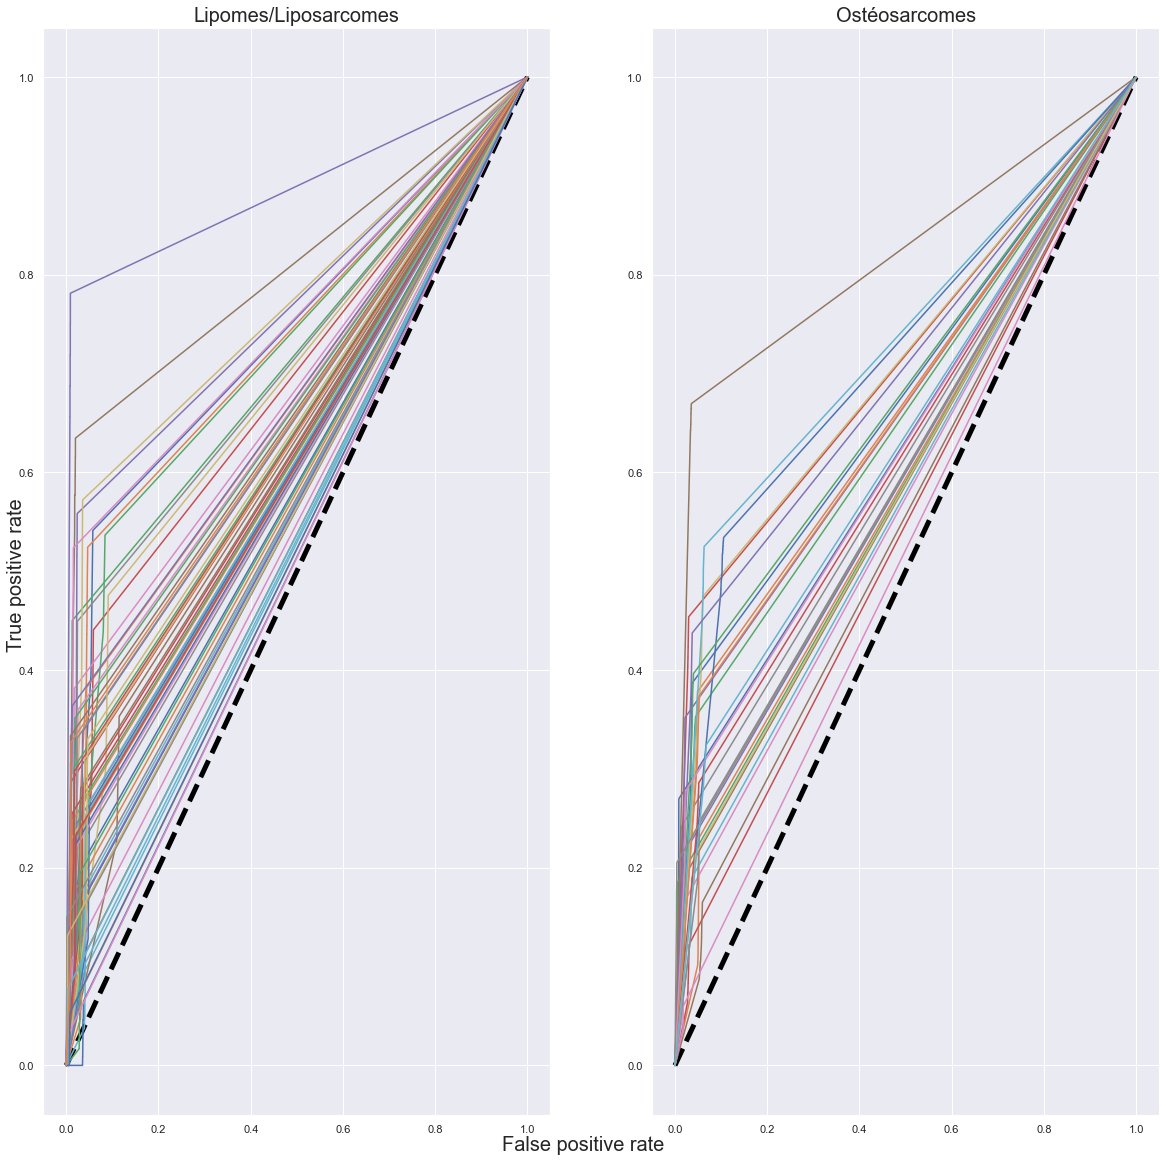

In [9]:
from sklearn.metrics import roc_curve
fig=plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1],linestyle='dashed',color='black',linewidth=5)
j=0
I_pred=io.imread('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\test-masks.tif')
I_labels=io.imread("C:\\Users\\zelmouaffek\\Desktop\\\Data_Lipos\\dataset_tif\\test-labels.tif")
for i in range (len(Case_l)) :
    if i!= 9:
        test_m_l= I_pred[j:j+Num_l[i]]  
        test_l_l= I_labels[j:j+Num_l[i]]  
        j+=Num_l[i]
        fpr_l, tpr_l, _ = roc_curve(test_l_l.ravel(),test_m_l.ravel(),pos_label=1)
        plt.plot(fpr_l, tpr_l)

#plt.ylabel('True positive rate', fontsize=20)
plt.title('Lipomes/Liposarcomes', fontsize=20)
plt.subplot(1,2,2)
I_pred=io.imread('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Sarcomes\\test-masks.tif')
I_labels=io.imread("C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\test-labels.tif")
plt.plot([0, 1], [0, 1],linestyle='dashed',color='black',linewidth=5)
j=0
for i in range (len(Case_O)) :
    if i!= 9:
        test_m_O= I_pred[j:j+Num_O[i]]  
        test_l_O= I_labels[j:j+Num_O[i]]  
        j+=Num_O[i]
        fpr, tpr, _ = roc_curve(test_l_O.ravel(),test_m_O.ravel(),pos_label=1)
        plt.plot(fpr, tpr)

#plt.xlabel('', fontsize=20)
plt.title('Ostéosarcomes', fontsize=20)
fig.text(0.5, 0.1, 'False positive rate', ha='center',fontsize=20)
fig.text(0.1, 0.5, 'True positive rate', va='center', rotation='vertical',fontsize=20)
plt.savefig("C:\\Users\\zelmouaffek\\Desktop\\Résultat\\ROC_curve.jpg", fontsize=20, quality =100)

plt.show()


In [10]:
X=[*range(0,31 , 1)]
A={'Case':[*range(0,31 , 1)],
  'Accuracy':Osteo_m['Accuracy'].tolist(),
  'Sensitivity':Osteo_m['Sensitivity'].tolist(),
  'Specifity':Osteo_m['Specifity'].tolist(),
  'Jaccard':Osteo_m['Jaccard'].tolist(),
  'ERROR Accuracy':Osteo_d['Accuracy'].tolist(), 
  }
B={'Case':[*range(0,43 , 1)],
  'Accuracy':Lipos_m['Accuracy'].tolist(),
  'Sensitivity':Lipos_m['Sensitivity'].tolist(),
  'Specifity':Lipos_m['Specifity'].tolist(),
  'Jaccard':Lipos_m['Jaccard'].tolist(), 
  }
Osteo = pd.DataFrame(A)
LipoS= pd.DataFrame(B)


<ipython-input-11-618af67f9a6d>:32: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(('Score global','Score individuel'),


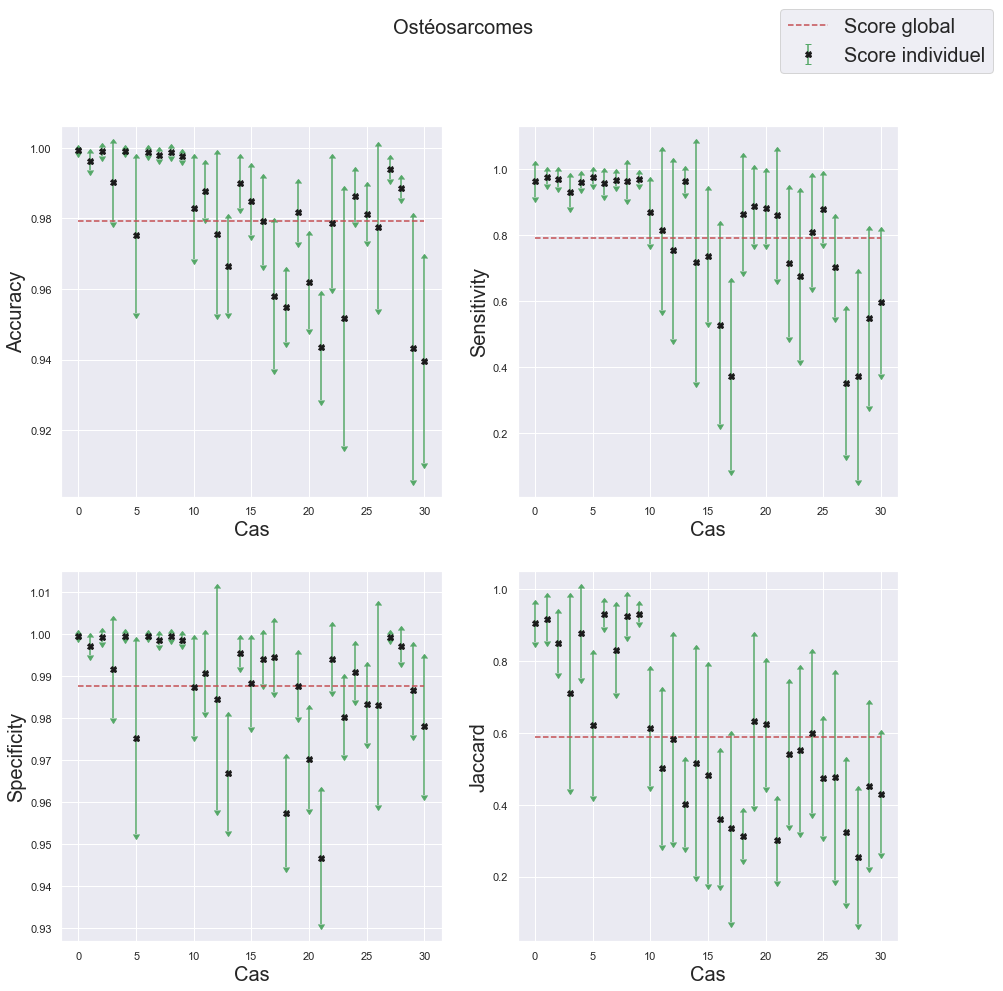

In [11]:
fig=plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
sns.set(style="darkgrid")
plt.errorbar(Osteo['Case'].tolist(),Osteo['Accuracy'].tolist(),Osteo_d['Accuracy'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='g')
plt.plot(Osteo['Case'].tolist(),Osteo_global['Moyenne'][0]*np.ones(len(Osteo_m['Accuracy'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.subplot(2,2,2)
sns.set(style="darkgrid")
plt.errorbar(Osteo['Case'].tolist(),Osteo['Sensitivity'].tolist(),Osteo_d['Sensitivity'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='g')
plt.plot(Osteo['Case'].tolist(),Osteo_global['Moyenne'][1]*np.ones(len(Osteo_m['Sensitivity'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)

plt.subplot(2,2,3)
sns.set(style="darkgrid")
plt.errorbar(Osteo['Case'].tolist(),Osteo['Specifity'].tolist(),Osteo_d['Specifity'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='g')
plt.plot(Osteo['Case'].tolist(),Osteo_global['Moyenne'][2]*np.ones(len(Osteo_m['Specifity'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Specificity', fontsize=20) 

plt.subplot(2,2,4)
sns.set(style="darkgrid")
plt.errorbar(Osteo['Case'].tolist(),Osteo['Jaccard'].tolist(),Osteo_d['Jaccard'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='g')
plt.plot(Osteo['Case'].tolist(),Osteo_global['Moyenne'][3]*np.ones(len(Osteo_m['Jaccard'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Jaccard', fontsize=20)

fig.suptitle('Ostéosarcomes ', fontsize=20)
fig.legend(('Score global','Score individuel'),
           loc='best',fontsize=20)
plt.savefig("C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Sarcomes\ALL.jpeg", quality =100)


<ipython-input-12-14ee9d334ad8>:31: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(('Score global ','Score individuel'),


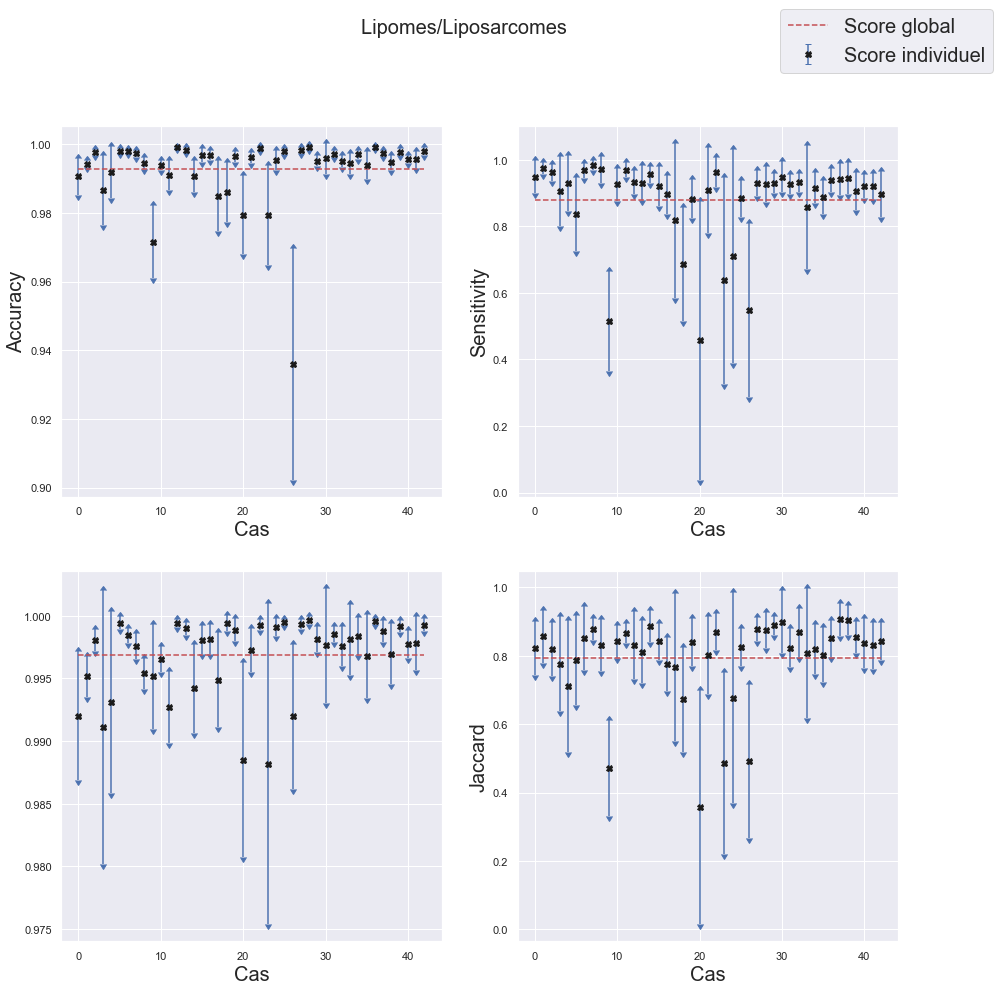

In [12]:
fig=plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
sns.set(style="darkgrid")
plt.errorbar(LipoS['Case'].tolist(),LipoS['Accuracy'].tolist(),Lipos_d['Accuracy'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='b')
plt.plot(LipoS['Case'].tolist(),Lipos_g['Moyenne'][0]*np.ones(len(Lipos_m['Accuracy'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.subplot(2,2,2)
sns.set(style="darkgrid")
plt.errorbar(LipoS['Case'].tolist(),LipoS['Sensitivity'].tolist(),Lipos_d['Sensitivity'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='b')
plt.plot(LipoS['Case'].tolist(),Lipos_g['Moyenne'][1]*np.ones(len(Lipos_m['Sensitivity'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)

plt.subplot(2,2,3)
sns.set(style="darkgrid")
plt.errorbar(LipoS['Case'].tolist(),LipoS['Specifity'].tolist(),Lipos_d['Specifity'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='b')
plt.plot(LipoS['Case'].tolist(),Lipos_g['Moyenne'][2]*np.ones(len(Lipos_m['Specifity'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)

plt.subplot(2,2,4)
sns.set(style="darkgrid")
plt.errorbar(LipoS['Case'].tolist(),LipoS['Jaccard'].tolist(),Lipos_d['Jaccard'].tolist(),uplims=True, lolims=True, fmt='X',c='k',ecolor='b')
plt.plot(LipoS['Case'].tolist(),Lipos_g['Moyenne'][3]*np.ones(len(Lipos_m['Jaccard'])),'--',c='r')
plt.xlabel('Cas', fontsize=20)
plt.ylabel('Jaccard', fontsize=20)

fig.suptitle('Lipomes/Liposarcomes ', fontsize=20)
fig.legend(('Score global ','Score individuel'),
           loc='best',fontsize=20)
plt.savefig("C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\ALL.jpeg", quality =100)


Text(0.5, 1.0, 'Lipos')

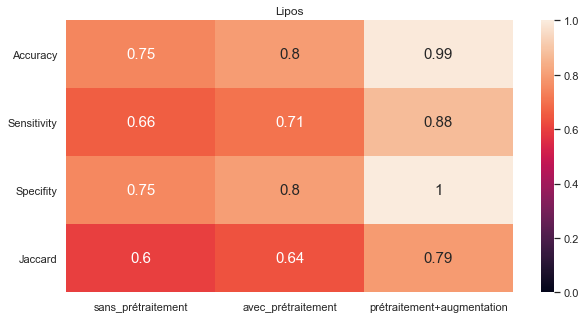

In [13]:
#Heatmap des Lipos
df={#'Cas':['Accuracy','Sensitivity','Specifity','Jaccard'],
   'data sans prétraitement':[Lipo_g['Moyenne'][0],Lipo_g['Moyenne'][1],Lipo_g['Moyenne'][2],Lipo_g['Moyenne'][3]],
   'data avec prétraitement':[Lipo_g1['Moyenne'][0],Lipo_g1['Moyenne'][1],Lipo_g1['Moyenne'][2],Lipo_g1['Moyenne'][3]],
   'data avec prétraitement et augmentation':[Lipo_global['Moyenne'][0],Lipo_global['Moyenne'][1],Lipo_global['Moyenne'][2],Lipo_global['Moyenne'][3]],
    }
df = pd.DataFrame(df)
fig=plt.figure(figsize=(10, 5))
ax = sns.heatmap(df, vmin=0, vmax=1,annot=True, annot_kws={"fontsize":15})
ax.set_yticklabels(('Accuracy','Sensitivity','Specifity','Jaccard'),rotation='horizontal')
ax.set_xticklabels(('sans_prétraitement','avec_prétraitement','prétraitement+augmentation'),rotation='horizontal')
plt.title("Lipos")

Text(0.5, 1.0, 'Osteos')

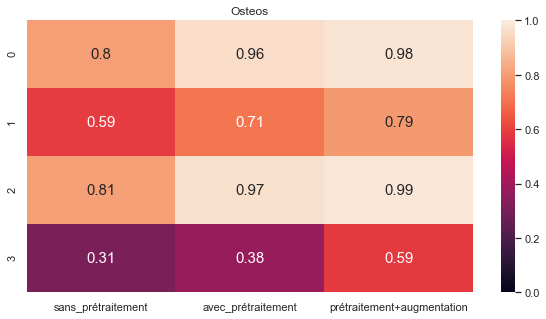

In [14]:
#Heatmap des Osteos

df1={#'Cas':['Accuracy','Sensitivity','Specifity','Jaccard'],
   'data sans prétraitement':[Osteo_g['Moyenne'][0],Osteo_g['Moyenne'][1],Osteo_g['Moyenne'][2],Osteo_g['Moyenne'][3]],
   'data avec prétraitement':[Osteo_g1['Moyenne'][0],Osteo_g1['Moyenne'][1],Osteo_g1['Moyenne'][2],Osteo_g1['Moyenne'][3]],
   'data avec prétraitement et augmentation':[Osteo_global['Moyenne'][0],Osteo_global['Moyenne'][1],Osteo_global['Moyenne'][2],Osteo_global['Moyenne'][3]],
    }
df1 = pd.DataFrame(df1)
fig=plt.figure(figsize=(10, 5))
ax = sns.heatmap(df1, vmin=0, vmax=1,annot=True, annot_kws={"fontsize":15})
ax.set_xticklabels(('sans_prétraitement','avec_prétraitement','prétraitement+augmentation'),rotation='horizontal')
plt.title("Osteos")

In [15]:
I_pred=io.imread('C:\\Users\\zelmouaffek\\Desktop\\Résultat\\Lipomes\\test-masks.tif')
I_GT=io.imread('C:\\Users\\zelmouaffek\\Desktop\\\Data_Lipos\\dataset_tif\\test-volume.tif')
I_labels=io.imread("C:\\Users\\zelmouaffek\\Desktop\\\Data_Lipos\\dataset_tif\\test-labels.tif")

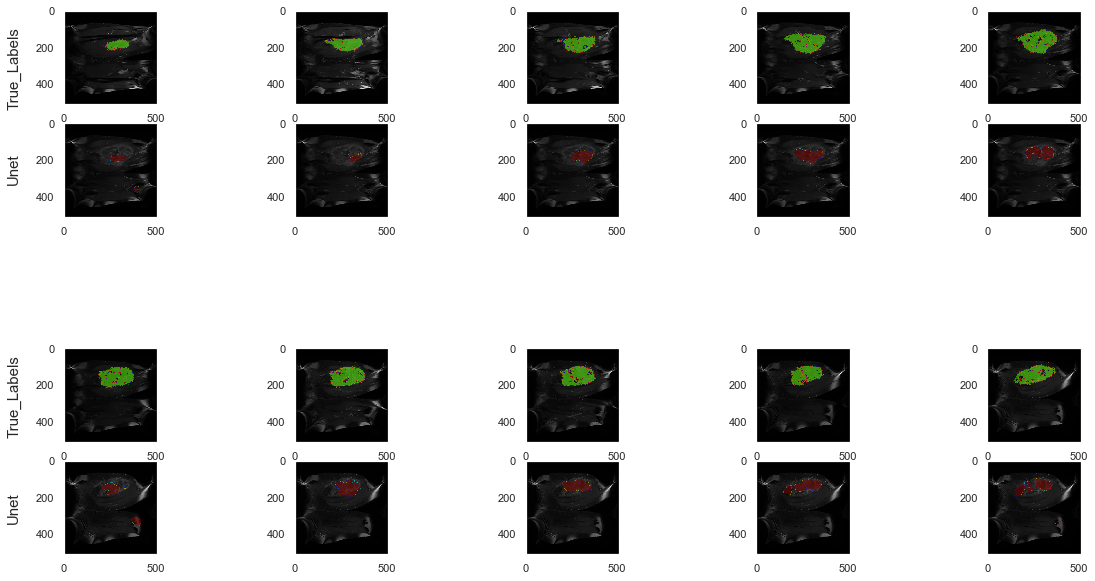

In [16]:
from matplotlib.pyplot import figure
h,k=0,10
for i in range(k):
    h+=Num_l[i]
IGT=I_GT[h:h+Num_l[k]]
Ipred=I_pred[h:h+Num_l[k]]
Ilabels=I_labels[h:h+Num_l[k]]
fig=plt.figure(figsize=(20, 10))
R=10
for i in range (5) :
        img=IGT[i]
        figure(num=1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(5,5,i+1)
        mask_1=Ilabels[i]
        masked_1 = np.ma.masked_where(mask_1 == 0, mask_1)
        plt.grid(None)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked_1, interpolation='none', alpha=0.5,cmap='prism')
for i in range (5) :
        plt.subplot(5,5,i+6)
        j+=1
        mask=Ipred[i]
        masked = np.ma.masked_where(mask == 0, mask)
        plt.grid(None)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked, 'jet', interpolation='none', alpha=0.5)
for i in range (5,10) :
        img=IGT[i]
        figure(num=1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(5,5,i+11)
        mask_1=Ilabels[i]
        masked_1 = np.ma.masked_where(mask_1 == 0, mask_1)
        plt.grid(None)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked_1, interpolation='none', alpha=0.5,cmap='prism')

for i in range (5,10) :

        plt.subplot(5,5,i+16)
        j+=1
        mask=Ipred[i]
        masked = np.ma.masked_where(mask == 0, mask)
        plt.grid(None)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked, 'jet', interpolation='none', alpha=0.5)

fig.text(0.12, 0.8, 'True_Labels', va='center', rotation='vertical',fontsize=15)
fig.text(0.12, 0.345, 'True_Labels', va='center', rotation='vertical',fontsize=15)

fig.text(0.12, 0.66, 'Unet', va='center', rotation='vertical',fontsize=15)
fig.text(0.12, 0.19, 'Unet', va='center', rotation='vertical',fontsize=15)

plt.show()